In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
os.getcwd()

'D:\\Jigsaw\\Classroom content\\MLAI\\Feature engg - structured data'

In [3]:
dm = pd.read_csv("dm.csv")

In [4]:
dm.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,Cust_Id
0,Old,Female,Own,Single,Far,47500,0,High,6,755,247
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,127
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296,479
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436,475
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304,151


In [5]:
os.listdir()

['.ipynb_checkpoints',
 'bh_sample.csv',
 'dm.csv',
 'dqr.py',
 'Feature engg - structured Data.ipynb']

In [6]:
dm.isnull().sum()

Age              0
Gender           0
OwnHome          0
Married          0
Location         0
Salary           0
Children         0
History        303
Catalogs         0
AmountSpent      0
Cust_Id          0
dtype: int64

In [7]:
dm['History'].unique()

array(['High', 'Low', 'Medium', nan], dtype=object)

In [8]:
dm.History.value_counts()

High      255
Low       230
Medium    212
Name: History, dtype: int64

In [9]:
dm.isnull().sum()/dm.shape[0] * 100

Age             0.0
Gender          0.0
OwnHome         0.0
Married         0.0
Location        0.0
Salary          0.0
Children        0.0
History        30.3
Catalogs        0.0
AmountSpent     0.0
Cust_Id         0.0
dtype: float64

#Since missing value is more than highesh - we can consider missing as new category
#Or use ML algoruithm to impute missing values

In [10]:
dm.describe(include = 'object').T

,count,unique,top,freq
Age,1000,3,Middle,508
Gender,1000,2,Female,506
OwnHome,1000,2,Own,516
Married,1000,2,Married,502
Location,1000,2,Close,710
History,697,3,High,255


In [11]:
dm.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1000,3,Middle,508,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,1000,2,Female,506,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OwnHome,1000,2,Own,516,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Married,1000,2,Married,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,1000,2,Close,710,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,1000,NaN,NaN,NaN,56103.9,30616.3,10100,29975,53700,77025,168800
Children,1000,NaN,NaN,NaN,0.934,1.05107,0,0,1,2,3
History,697,3,High,255,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Catalogs,1000,NaN,NaN,NaN,14.682,6.6229,6,6,12,18,24
AmountSpent,1000,NaN,NaN,NaN,1216.77,961.069,38,488.25,962,1688.5,6217


In [12]:
#Data Quality report
%run dqr.py

In [13]:
report = dataQuality(dm)

In [14]:
report.keys()

dict_keys(['numeric', 'categorical'])

In [15]:
#Summary of numeric variables
report['numeric']

,Count,Unique,Miss_per,Min,Max,Mean,Median,Std,Var,Q1,Q3,q99
Salary,1000.0,636.0,0.0,10100.0,168800.0,56103.900,53700.0,30616.314826,9.373587e+08,29975.00,77025.0,126505.00
Children,1000.0,4.0,0.0,0.0,3.0,0.934,1.0,1.051070,1.104749e+00,0.00,2.0,3.00
Catalogs,1000.0,4.0,0.0,6.0,24.0,14.682,12.0,6.622895,4.386274e+01,6.00,18.0,24.00
AmountSpent,1000.0,852.0,0.0,38.0,6217.0,1216.770,962.0,961.068613,9.236529e+05,488.25,1688.5,4281.79
Cust_Id,1000.0,709.0,0.0,12.0,1297.0,643.930,636.0,369.047166,1.361958e+05,316.75,955.5,1283.03


In [16]:
#Summary of categorical variables
report['categorical']

,Count,Unique,Miss_per,Freq_Level,freq_cat_Per
Age,1000,3,0,Middle,0.508
Gender,1000,2,0,Female,0.506
OwnHome,1000,2,0,Own,0.516
Married,1000,2,0,Married,0.502
Location,1000,2,0,Close,0.71
History,697,4,0.303,High,0.255


In [17]:
dm.groupby('History')['AmountSpent'].mean()

History
High      2186.137255
Low        357.086957
Medium     950.400943
Name: AmountSpent, dtype: float64

#Using ML to fill missing values by using ML algorithm

In [18]:
#Train
train = dm[~dm['History'].isin([np.nan])]

In [19]:
train.shape

(697, 11)

In [20]:
test = dm[dm['History'].isin([np.nan])]

In [21]:
test.shape

(303, 11)

In [22]:
train.columns

Index(['Age', 'Gender', 'OwnHome', 'Married', 'Location', 'Salary', 'Children',
       'History', 'Catalogs', 'AmountSpent', 'Cust_Id'],
      dtype='object')

In [23]:
x_train  = pd.get_dummies(train.drop(['Cust_Id', 'History'], axis = 1)) #One hot encoding

In [24]:
x_train.shape

(697, 15)

In [25]:
y_train = train['History']
y_train

0        High
1        High
2         Low
3        High
4        High
        ...  
991       Low
993      High
997    Medium
998    Medium
999    Medium
Name: History, Length: 697, dtype: object

In [26]:
y_train.unique()

array(['High', 'Low', 'Medium'], dtype=object)

#need to make these are numerical - using label encoder

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
enc = LabelEncoder()
y_train = enc.fit_transform(y_train)

In [29]:
y_train

array([0, 0, 1, 0, 0, 1, 2, 0, 1, 0, 2, 0, 0, 0, 0, 1, 1, 1, 2, 0, 2, 1,
       0, 2, 2, 0, 0, 0, 1, 0, 2, 1, 1, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 2, 2, 1, 1, 0, 2, 0, 0, 1, 1, 0, 1, 1, 2, 2, 2, 1, 2, 1, 0, 0,
       0, 2, 1, 1, 1, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 1, 2, 1, 2, 0, 0, 1,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 2, 1, 2, 0, 0, 0, 1, 0, 2, 0, 0, 2, 1, 2, 2, 2, 0, 1,
       1, 2, 2, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 2, 2, 1, 0, 1, 1, 2, 0,
       1, 2, 2, 0, 2, 1, 1, 2, 1, 2, 0, 1, 0, 2, 2, 2, 0, 0, 2, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 2, 2, 2, 2, 0, 2, 1, 2, 0, 2, 0, 2, 2, 1, 2, 2, 2, 0, 2,
       0, 2, 0, 1, 1, 2, 1, 1, 1, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0,
       2, 1, 1, 2, 0, 0, 0, 2, 1, 0, 2, 0, 1, 2, 0, 0, 0, 1, 2, 1, 0, 2,
       1, 0, 0, 2, 2, 1, 2, 0, 0, 2, 0, 1, 1, 0, 2, 2, 1, 1, 1, 0, 0, 2,
       2, 0, 2, 0, 1, 0, 0, 1, 0, 1, 2, 0, 1, 0, 2,

In [30]:
enc.classes_

array(['High', 'Low', 'Medium'], dtype=object)

 - ene.class_ follows same heirarchy as before like y_train.unique()

# Decison tree classifier to impute missing values
#OR Imputing missing vlaues using ML algorithm

In [31]:
import sklearn

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
clf = DecisionTreeClassifier(max_depth = 3)

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
model = GridSearchCV(clf, param_grid = {'max_depth': [3,5,7]})
model.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=3),
             param_grid={'max_depth': [3, 5, 7]})

In [36]:
model.best_estimator_

DecisionTreeClassifier(max_depth=7)

In [37]:
model.best_score_

0.9197636176772868

In [38]:
test.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,Cust_Id
9,Old,Male,Own,Married,Far,80700,0,NaN,18,3034,475
10,Young,Male,Rent,Married,Close,43700,1,NaN,12,927,157
15,Middle,Female,Own,Married,Far,83100,1,NaN,12,2766,808
24,Young,Female,Rent,Married,Close,41700,1,NaN,6,521,661
26,Middle,Male,Own,Single,Close,62800,3,NaN,6,707,973


In [39]:
x_test = pd.get_dummies(test.drop(['Cust_Id', 'History'], axis = 1))
x_test.shape

(303, 15)

In [40]:
clf1 = model.best_estimator_

In [41]:
pred = clf1.predict(x_test)
pred

array([0, 2, 0, 2, 2, 1, 2, 2, 0, 0, 0, 2, 0, 2, 1, 0, 0, 1, 1, 0, 1, 2,
       2, 1, 0, 2, 1, 2, 0, 0, 0, 1, 1, 2, 0, 1, 1, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 1, 0, 1, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 0, 2, 2, 1,
       0, 2, 0, 0, 1, 1, 0, 1, 2, 0, 0, 0, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 0, 1, 2, 0, 0, 0, 2, 2, 1, 1, 0, 1, 1, 2, 0, 2, 1, 2, 1, 2,
       2, 2, 2, 1, 1, 2, 2, 1, 2, 0, 0, 1, 2, 0, 1, 2, 0, 1, 1, 2, 0, 2,
       1, 2, 2, 2, 0, 1, 2, 0, 2, 0, 0, 2, 0, 2, 1, 2, 0, 2, 2, 0, 1, 1,
       2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 0, 2, 0, 2, 0,
       0, 0, 0, 1, 0, 1, 1, 2, 0, 2, 1, 1, 2, 0, 0, 1, 1, 1, 2, 1, 0, 1,
       0, 2, 2, 0, 0, 1, 1, 2, 0, 2, 1, 2, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2,
       2, 0, 2, 1, 1, 2, 1, 1, 2, 1, 0, 0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 1,
       2, 0, 2, 2, 0, 2, 2, 1, 0, 1, 0, 1, 2, 0, 0, 1, 2, 1, 0, 2, 0, 1,
       1, 2, 2, 2, 1, 0, 1, 1, 1, 2, 1, 1, 1, 0, 2, 2, 2, 0, 0, 2, 0, 1,
       0, 0, 1, 2, 1, 1, 2, 0, 1, 1, 1, 2, 0, 0, 1,

In [42]:
#Inverse transform
enc.inverse_transform(pred)

array(['High', 'Medium', 'High', 'Medium', 'Medium', 'Low', 'Medium',
       'Medium', 'High', 'High', 'High', 'Medium', 'High', 'Medium',
       'Low', 'High', 'High', 'Low', 'Low', 'High', 'Low', 'Medium',
       'Medium', 'Low', 'High', 'Medium', 'Low', 'Medium', 'High', 'High',
       'High', 'Low', 'Low', 'Medium', 'High', 'Low', 'Low', 'Low',
       'Medium', 'Low', 'Medium', 'Low', 'Low', 'Medium', 'Low', 'Low',
       'Low', 'High', 'Low', 'High', 'High', 'Medium', 'High', 'High',
       'High', 'Medium', 'Medium', 'High', 'High', 'High', 'Low', 'High',
       'High', 'Medium', 'Medium', 'Low', 'High', 'Medium', 'High',
       'High', 'Low', 'Low', 'High', 'Low', 'Medium', 'High', 'High',
       'High', 'Low', 'Medium', 'Medium', 'Low', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Low', 'Low', 'Medium', 'High',
       'Low', 'Medium', 'High', 'High', 'High', 'Medium', 'Medium', 'Low',
       'Low', 'High', 'Low', 'Low', 'Medium', 'High', 'Medium', 'Low',
       'Me

In [43]:
test['History'] = enc.inverse_transform(pred)

C:\Users\Lakshmipathi PS\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
test.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,Cust_Id
9,Old,Male,Own,Married,Far,80700,0,High,18,3034,475
10,Young,Male,Rent,Married,Close,43700,1,Medium,12,927,157
15,Middle,Female,Own,Married,Far,83100,1,High,12,2766,808
24,Young,Female,Rent,Married,Close,41700,1,Medium,6,521,661
26,Middle,Male,Own,Single,Close,62800,3,Medium,6,707,973


In [45]:
test.isnull().sum()

Age            0
Gender         0
OwnHome        0
Married        0
Location       0
Salary         0
Children       0
History        0
Catalogs       0
AmountSpent    0
Cust_Id        0
dtype: int64

NOw, all are nulls are filled with values

# now merging both train and test to get complete data

In [46]:
data = pd.merge(train, test, how = 'outer')

In [47]:
data.shape

(1000, 11)

In [52]:
data.isnull().sum()

Age            0
Gender         0
OwnHome        0
Married        0
Location       0
Salary         0
Children       0
History        0
Catalogs       0
AmountSpent    0
Cust_Id        0
dtype: int64

In [49]:
dm.groupby('History')['AmountSpent'].mean()

History
High      2186.137255
Low        357.086957
Medium     950.400943
Name: AmountSpent, dtype: float64

In [50]:
data.groupby('History')['AmountSpent'].mean()

History
High      2137.189112
Low        389.048485
Medium    1066.993769
Name: AmountSpent, dtype: float64

##Look how close they are and doesnt seem to be high drastic change

# Outliers##

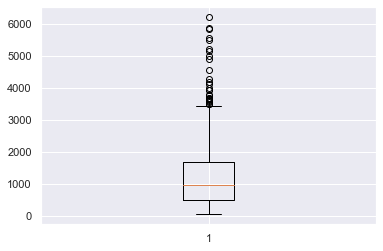

In [51]:
b = plt.boxplot(data['AmountSpent'])

In [53]:
b

{'whiskers': [<matplotlib.lines.Line2D at 0x192f9048e48>,
 'caps': [<matplotlib.lines.Line2D at 0x192f905b630>,
 'boxes': [<matplotlib.lines.Line2D at 0x192f9048b00>],
 'medians': [<matplotlib.lines.Line2D at 0x192f905bda0>],
 'fliers': [<matplotlib.lines.Line2D at 0x192f9065198>],
 'means': []}

In [54]:
b['fliers']

In [57]:
##Will use list comprehension
out = [i.get_ydata() for i in b['fliers']]
out

[array([5564, 3655, 3604, 4182, 4558, 3688, 3596, 4279, 4894, 3491, 5830,
        3632, 3671, 5151, 5878, 5209, 4109, 3995, 3780, 6217, 3785, 5503,
        3505, 3916, 3941, 4984, 3537], dtype=int64)]

In [58]:
out[0]

array([5564, 3655, 3604, 4182, 4558, 3688, 3596, 4279, 4894, 3491, 5830,
       3632, 3671, 5151, 5878, 5209, 4109, 3995, 3780, 6217, 3785, 5503,
       3505, 3916, 3941, 4984, 3537], dtype=int64)

In [60]:
dm[dm['AmountSpent'].isin(out[0])]['Salary'].describe()

count        27.000000
mean     107688.888889
std       18513.203881
min       68000.000000
25%       96400.000000
50%      110000.000000
75%      122850.000000
max      140000.000000
Name: Salary, dtype: float64

# Importing other data set

In [80]:
bh = pd.read_csv('bh_sample.csv')

In [81]:
bh.head()

,TARGET,cus_employername,profit_loss_after_cost,agrgrp_writeoff
0,1.0,British Gas,350.25,NaN
1,1.0,Guys And St Thomas Nhs Trust,904.00,NaN
2,0.0,Ejasonics,-186.00,1.0
3,0.0,Derby Unitex,-161.00,1.0
4,0.0,Nhs,-13.50,NaN


In [82]:
bh.shape

(29105, 4)

In [83]:
report= dataQuality(bh)

In [84]:
report['numeric']

,Count,Unique,Miss_per,Min,Max,Mean,Median,Std,Var,Q1,Q3,q99
TARGET,22888.0,3.0,0.213606,0.00,1.0,0.451459,0.0,0.497649,0.247655,0.0,1.00,1.00
profit_loss_after_cost,29105.0,11709.0,0.000000,-2448.25,2284.9,90.058790,23.0,297.258559,88362.650789,-136.0,201.64,1114.48
agrgrp_writeoff,11045.0,3.0,0.620512,1.00,2.0,1.000905,1.0,0.030077,0.000905,1.0,1.00,1.00


In [85]:
report['categorical']

,Count,Unique,Miss_per,Freq_Level,freq_cat_Per
cus_employername,29102,16193,0.000103075,Tesco,0.0191376


In [86]:
bh.isnull().mean()

TARGET                    0.213606
cus_employername          0.000103
profit_loss_after_cost    0.000000
agrgrp_writeoff           0.620512
dtype: float64

In [87]:
bh.isnull().sum()

TARGET                     6217
cus_employername              3
profit_loss_after_cost        0
agrgrp_writeoff           18060
dtype: int64

In [88]:
#All Columns with more than 30% missing values are removed. So, below is the code
bh = bh.loc[:,bh.isnull().mean()<=0.3]
bh.head()

,TARGET,cus_employername,profit_loss_after_cost
0,1.0,British Gas,350.25
1,1.0,Guys And St Thomas Nhs Trust,904.00
2,0.0,Ejasonics,-186.00
3,0.0,Derby Unitex,-161.00
4,0.0,Nhs,-13.50


In [89]:
bh = bh.dropna()

In [90]:
bh.shape

(22887, 3)

#Converting all postiv values to 1 and all negative values to zero

In [91]:
bh['profit_loss_after_cost'] = np.where(bh['profit_loss_after_cost'] <=0, 0, 1)

In [92]:
bh.head()

,TARGET,cus_employername,profit_loss_after_cost
0,1.0,British Gas,1
1,1.0,Guys And St Thomas Nhs Trust,1
2,0.0,Ejasonics,0
3,0.0,Derby Unitex,0
4,0.0,Nhs,0


In [93]:
bh['profit_loss_after_cost'].value_counts()

0    12554
1    10333
Name: profit_loss_after_cost, dtype: int64

In [95]:
len(bh['cus_employername'].unique())

13282

Variance will be large - if we add names since 13K uniques are there
data will become sparse - model becomes complicated with so many dummies

In [96]:
X = pd.get_dummies(bh['cus_employername'])
X.shape

(22887, 13282)

In [98]:
Y = bh['TARGET']

In [99]:
clf2 = DecisionTreeClassifier(max_depth = 4)
clf2.fit(X,Y)

DecisionTreeClassifier(max_depth=4)

In [100]:
bh['Group'] = clf2.apply(X)

In [101]:
bh.head()

,TARGET,cus_employername,profit_loss_after_cost,Group
0,1.0,British Gas,1,4
1,1.0,Guys And St Thomas Nhs Trust,1,4
2,0.0,Ejasonics,0,4
3,0.0,Derby Unitex,0,4
4,0.0,Nhs,0,4


In [102]:
bh['Group'].unique()

array([4, 7, 8, 6, 5], dtype=int64)

##Now can drop these names column - and use these 5 group names and not loosing any information
#now this is the reduced number of levels

In [103]:
bh = bh.drop(['cus_employername'], axis = 1)

In [104]:
bh.head()

,TARGET,profit_loss_after_cost,Group
0,1.0,1,4
1,1.0,1,4
2,0.0,0,4
3,0.0,0,4
4,0.0,0,4


In [105]:
bh.shape

(22887, 3)

In [107]:
bh.dtypes

TARGET                    float64
profit_loss_after_cost      int32
Group                       int64
dtype: object

In [108]:
bh['Group'] = bh['Group'].astype('O')

In [109]:
bh = pd.get_dummies(bh)
bh.head()

,TARGET,profit_loss_after_cost,Group_4,Group_5,Group_6,Group_7,Group_8
0,1.0,1,1,0,0,0,0
1,1.0,1,1,0,0,0,0
2,0.0,0,1,0,0,0,0
3,0.0,0,1,0,0,0,0
4,0.0,0,1,0,0,0,0
